# Basic Libraries

In [1]:
import matplotlib.image as mi
import matplotlib.pyplot as plt
import numpy as np

# These are some basic libraries which have been used.

# Reading Image

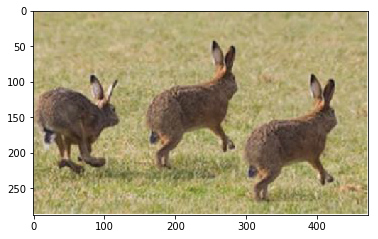

(288, 472, 3)

In [2]:
img=mi.imread('Image/rabbit.png')
plt.imshow(img)
plt.show()
img.shape

# This is where we are reading image.

# As mentioned in report itself, that this system has been desgined for 3-channeled image so,keep in mind while reading image.

In [3]:
# As we can see 3 in the last it denotes the no. of channel present in image.

# Size of Image

In [4]:
height=img.shape[0]
width=img.shape[1]

# This is where we are finding the size of image.

# Color to grayscale

In [5]:
img2D=np.zeros((height,width))

In [6]:
for i in range(height):
    for j in range(width):
        img2D[i][j]=(0.3*img[i][j][0] + 0.59*img[i][j][1] + 0.11*img[i][j][2])
        
# This is the weighted method which has been employed to convert color to grayscale.

# We could have used another method known as average method but that gives somewhat black image.

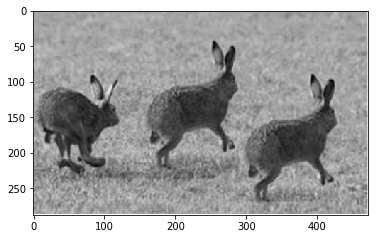

(288, 472)

In [7]:
plt.imshow(img2D,cmap='gray')
plt.show()
img2D.shape

# Derivatives of pixel intensity:- Ix and Iy

In [8]:
#derivative masks or kernels
fx=np.array([(-1,0,1),(-1,0,1),(-1,0,1)])
fy=np.array([(1,1,1),(0,0,0),(-1,-1,-1)])
print("Deivative mask for x direction:")
print()
print(fx)
print()
print("Deivative mask for y direction:")
print()
print(fy)

Deivative mask for x direction:

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]

Deivative mask for y direction:

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


In [9]:
def derivative(img2D,height,width,kernel):
    Id=np.zeros((height,width))
    m=0
    n=0
    sum_result=0
    for i in range(1,height-1):
        for j in range(1,width-1):
            for k in range(i-1,i+2):
                for l in range(j-1,j+2):
                    sum_result+=img2D[k][l]*kernel[m][n]
                    n=n+1
                n=0
                m=m+1
            m=0
            Id[i][j]=sum_result/3
            sum_result=0
    return Id

# This is where we are finding the derivative of image.

# Ix:Gradient of image in x direction

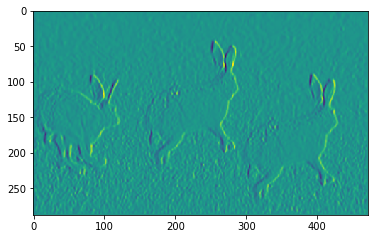

In [10]:
Ix=derivative(img2D,height,width,fx)
plt.imshow(Ix)
plt.show()

# The above function has been called to find the derivative of image in x direction.

# Iy:Gradient of image in y direction

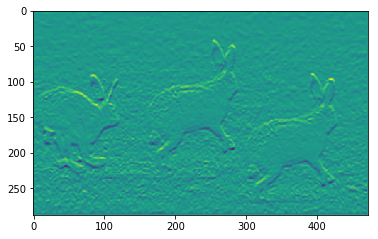

In [11]:
Iy=derivative(img2D,height,width,fy)
plt.imshow(Iy)
plt.show()

# In the same way for y direction only the difference being use of different mask for x and y as shown above.

# Calculating Auto-correlation matrix

Weighing function w(x,y)=g(x,y,σ)=exp(−(x**2+y**2)/2(σ**2))/2Π(σ**2)

In [12]:
def weighingfn(x,y,σ):
    result=np.exp(-(x**2+y**2)/(2*(σ**2)))/(2*np.pi*(σ**2))**0.5
    return result

# This weighing function has been used, it is guassian function here i have used sigma=1.

In [13]:
def gaussian_filter(derivative_product,σ):
    sums=0
    kernel=np.zeros((3,3))
    for y in range(-1,2,1):
        for x in range(-1,2,1):
            kernel[y+1][x+1]=weighingfn(x,y,σ)
            sums+=kernel[y+1][x+1]
            
    for i in range(3):
        for j in range(3):
            kernel[i][j]/=sums
    print(kernel)
    
    #  This is where we r generating the guassian kernel of size 3 X 3.
    
    Idd=np.zeros((height,width))
    m=0
    n=0
    sum_result=0
    for i in range(1,height-1):
        for j in range(1,width-1):
            for k in range(i-1,i+2):
                for l in range(j-1,j+2):
                    sum_result+=derivative_product[k][l]*kernel[m][n]
                    n=n+1
                n=0
                m=m+1
            m=0
            Idd[i][j]=sum_result/3
            sum_result=0
    return Idd

# This whole shadowed part is responsible for convolution part.

Computing the sum of the products of derivatives at each pixel

In [14]:
Ixx=gaussian_filter(Ix**2,1)

# This is where we are calling the above fn for finding elements of auto-correlation matrix M.

[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]


In [15]:
Iyy=gaussian_filter(Iy**2,1)
# Same for this.

[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]


In [16]:
Ixy=gaussian_filter(Ix*Iy,1)

[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]


Auto-correlation Matrix M=[[Ixx,Ixy],[Ixy,Iyy]]

In [17]:
M=[[Ixx,Ixy],[Ixy,Iyy]]
print(M)

# This is auto-correlation matrix M.

[[array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00124614, 0.00101823, ..., 0.00265782, 0.00406724,
        0.        ],
       [0.        , 0.00193955, 0.00156721, ..., 0.00378554, 0.00583255,
        0.        ],
       ...,
       [0.        , 0.00126605, 0.00150144, ..., 0.00200789, 0.0029613 ,
        0.        ],
       [0.        , 0.00069781, 0.00088706, ..., 0.00094375, 0.00134414,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]]), array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.00063249, -0.00068598, ...,  0.00085616,
         0.00097191,  0.        ],
       [ 0.        , -0.00049656, -0.00053855, ...,  0.0004045 ,
         0.00048488,  0.        ],
       ...,
       [ 0.        ,  0.00138499,  0.00190283, ..., -0.00099736,
        -0.00156289,  0.        ],
       [

# Harris Response Calculation

In [18]:
response=[]

# Find determinant and trace of auto-correlation matrix i.e M, use to get corner response.

# k is sensitive factor to separate corners from edges and has value close to zero.

k=0.05
#determinant
detM = (Ixx*Iyy)-(Ixy**2)
# trace
traceM = Ixx + Iyy
response=detM-k*(traceM**2)

# Now here we are calculating the response value of each pixel using auto-correlation matrix M.

# Corner and Edge

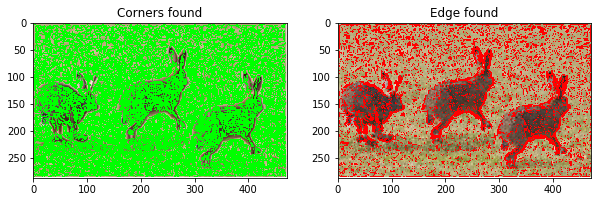

In [19]:
image_for_corner=np.copy(img)
image_for_edge=np.copy(img)
for rowindex,response_value in enumerate(response):
    for colindex,r in enumerate(response_value):
        if r>0: # It is corner
            image_for_corner[rowindex,colindex]=[0,1,0]
        elif r<0: # It is an edge
            image_for_edge[rowindex,colindex]=[1,0,0]
fig,axis=plt.subplots(nrows=1,ncols=2,figsize=(10,10))
axis[0].set_title("Corners found")
axis[0].imshow(image_for_corner)
axis[1].set_title("Edge found")
axis[1].imshow(image_for_edge)
plt.show()

# After finding M and response value, we r detecting the corner points and edges.

# Since the image read is densely populated that's why it is not working that much perfect now.

# Below we can see the part which has been copy move forged ,we are getting approx same corner points and edge.

# Lets run it with another image.

# If we would have any part copy move forged,we would have got the approx same no. of corner points 
#    and edges as we got in previous image.
